# ArtGraph Dataset: Exploratory Data Analysis
In this notebook EDA is performed on the content of ArtGraph. This analysis is not related to the visual captioning task, but to the part of the system that will perform classification over the classes and labels of the artworks in the graph.

In [1]:
import sys
import os
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
PROJECT_DIR = Path(os.getcwd()).resolve().parent
SRC_DIR = PROJECT_DIR / "src"
DATA_DIR = PROJECT_DIR / "data"
RAW_DATA_DIR = DATA_DIR / "raw"

In [9]:
df = pd.read_csv(RAW_DATA_DIR / "artgraph_dataset.csv")
df

,image,artist,style,genre,tags,media
0,antonio-lopez_dead-girl-1957.jpg,antonio-lopez,surrealism,genre painting,NaN,NaN
1,antonio-lopez_artists-working.jpg,antonio-lopez,contemporary realism,genre painting,Standing,NaN
2,antonio-lopez_sinforoso-and-josefa-1955.jpg,antonio-lopez,realism,portrait,Cheek,NaN
3,anatoli-papian_portrait-of-anna-1983.jpg,anatoli-papian,expressionism,portrait,"Head, Cheek, Lady","oil, canvas"
4,hans-richter_portrait-of-dora-rukser-1927.jpg,hans-richter,cubism,portrait,Head,NaN
...,...,...,...,...,...,...
116470,alexander-ivanov_portrait-of-vittoria-marini.jpg,alexander-ivanov,romanticism,portrait,"female-portraits, Cheek","oil, canvas"
116471,alexander-ivanov_olive-trees.jpg,alexander-ivanov,romanticism,landscape,"Plant, forests-and-trees, Tree, Woody plant, B...","oil, canvas"
116472,alexander-ivanov_annunciation-1824.jpg,alexander-ivanov,academicism,religious painting,"Christianity, Virgin-Mary, Prophet, angels-and...",NaN
116473,alexander-ivanov_on-the-shore-of-the-bay-of-na...,alexander-ivanov,romanticism,landscape,"Mythology, islands-and-bays","oil, canvas"


In [10]:
artists_df = df.groupby(["artist"]).count().reset_index()
valid_artists = set(
    artists_df[artists_df["image"] >= 100]["artist"].values
)
df.loc[~df["artist"].isin(valid_artists), "artist"] = pd.NA

In [11]:
df.describe()

,image,artist,style,genre,tags,media
count,116475,61682,116475,116475,95588,44849
unique,116475,242,32,18,48524,927
top,antonio-lopez_dead-girl-1957.jpg,vincent-van-gogh,impressionism,portrait,Lady,"oil, canvas"
freq,1,1886,14799,20736,2081,22518


In [4]:
df.describe()

,image,artist,style,genre,tags,media
count,116475,116475,116475,116475,95588,44849
unique,116475,2501,32,18,48524,927
top,antonio-lopez_dead-girl-1957.jpg,vincent-van-gogh,impressionism,portrait,Lady,"oil, canvas"
freq,1,1886,14799,20736,2081,22518


Each artwork is assigned to a single artist, style, and genre. Not all artworks are assigned to tags and media. Also, an artwork can be associated to multiple tags and media.

In [5]:
def plot_column(df, column):
    # count the number of occurrences of each category
    value_counts = df[column].value_counts()

    print(f"In total there are {len(value_counts)} {column}s")

    # plot the distribution using a bar plot
    value_counts.plot(kind='barh')

    # set plot title and axis labels
    plt.title(f"Distribution of {column}s")
    plt.xlabel('Count')
    plt.ylabel('Value')

    # display the plot
    plt.show()

In total there are 18 genres


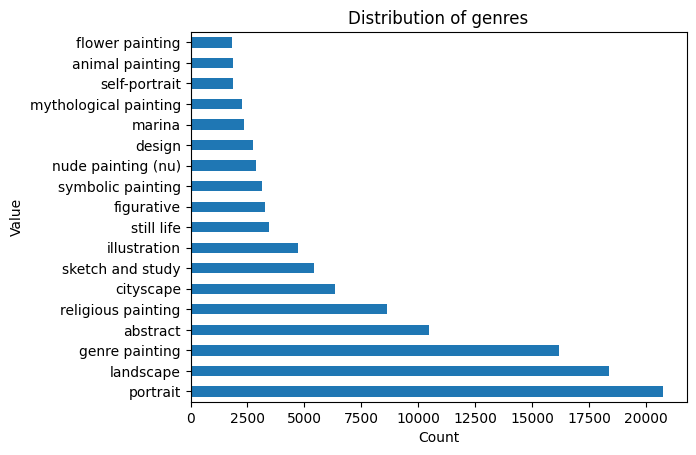

In [6]:
plot_column(df, "genre")

In total there are 32 styles


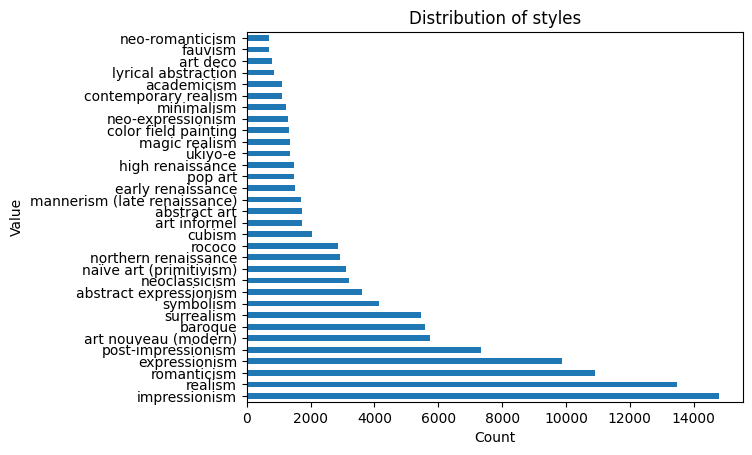

In [7]:
plot_column(df, "style")

In [8]:
artists_df = df.groupby(["artist"]).count()
artists_df = artists_df.reset_index()

In [9]:
print(f"There are {len(artists_df.loc[artists_df['image'] == 1])} artists with a single artwork")

There are 69 artists with a single artwork


In [10]:
print(f"There are {len(artists_df[artists_df['image'] >= 100])} artists with 100 or more artworks")

There are 242 artists with 100 or more artworks


<Axes: title={'center': 'Distribution of artists with most artworks'}, xlabel='Count', ylabel='Value'>

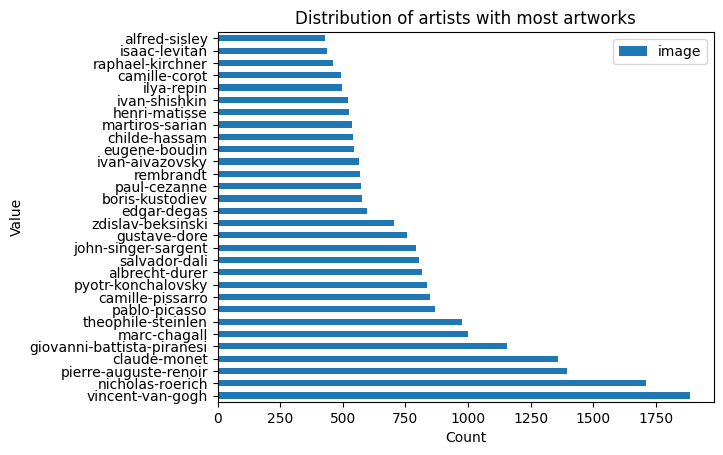

In [11]:
artists_with_most_works = artists_df.nlargest(30, "image")
artists_with_most_works.plot.barh(x="artist", y="image", xlabel="Count", ylabel="Value", title="Distribution of artists with most artworks")

In [12]:
tags = df["tags"].tolist()
tags = [tag for tag in tags if type(tag) == str]
tags_all = []
for tag in tags:
    tags_all += tag.split(", ")

There are 429 tags with 100 or more artworks associated


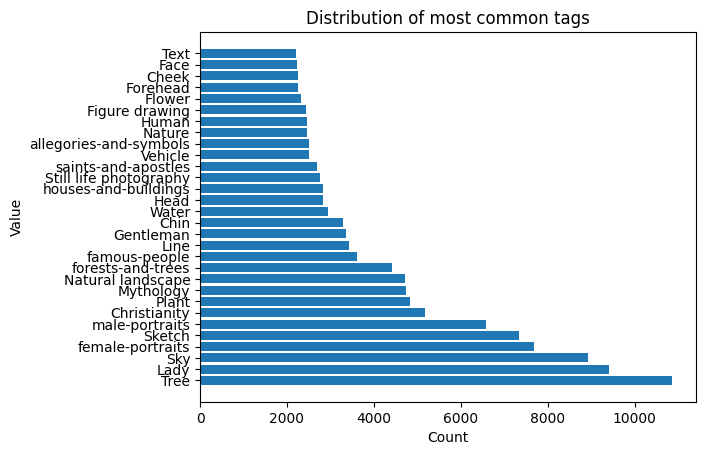

In [13]:
# count the frequencies of each element in the list
freq = Counter(tags_all)

# create a list of the elements and their frequencies sorted by frequency
sorted_freqs = sorted(freq.items(), key=lambda x: x[1], reverse=True)
best_sorted_freqs = [freq for freq in sorted_freqs if freq[1] >= 100]
print(f"There are {len(best_sorted_freqs)} tags with 100 or more artworks associated")

# create a bar plot of the frequencies
plt.barh(range(len(best_sorted_freqs[:30])), [val[1] for val in best_sorted_freqs[:30]], align='center')
plt.yticks(range(len(best_sorted_freqs[:30])), [val[0] for val in best_sorted_freqs[:30]])
plt.xlabel('Count')
plt.ylabel('Value')
plt.title('Distribution of most common tags')
plt.show()

In [14]:
media = df["media"].tolist()
media = [medium for medium in media if type(medium) == str]
media_all = []
for medium in media:
    media_all += medium.split(", ")

There are 31 media with 100 or more artworks associated


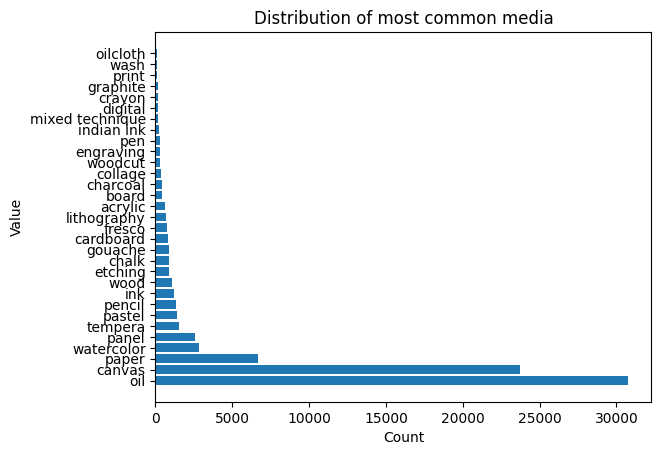

In [15]:
# count the frequencies of each element in the list
freq = Counter(media_all)

# create a list of the elements and their frequencies sorted by frequency
sorted_freqs = sorted(freq.items(), key=lambda x: x[1], reverse=True)
best_sorted_freqs = [freq for freq in sorted_freqs if freq[1] >= 100]
print(f"There are {len(best_sorted_freqs)} media with 100 or more artworks associated")

# create a bar plot of the frequencies
plt.barh(range(len(best_sorted_freqs)), [val[1] for val in best_sorted_freqs], align='center')
plt.yticks(range(len(best_sorted_freqs)), [val[0] for val in best_sorted_freqs])
plt.xlabel('Count')
plt.ylabel('Value')
plt.title('Distribution of most common media')
plt.show()